### ■ 파이썬 전체 수업 복습
    1. 파이썬 기본 문법(파이썬 자료형 5가지, 연산자)
    2. 오라클 함수와 파이썬 함수를 비교하면 함수를 생성
    3. 문자형 자료형의 메소드들
    4. 리스트형 자료형의 메소드들
    5. 딕셔너리형 자료형의 메소드들
    6. 판다스 사용법 오라클과 비교
    7. OS 파일의 오픈과 닫기와 같은 파일 다루는 방법
    8. 웹스크롤링
        - EBS 레이디버그 시청자 게시판
        - 중앙일보
        - 동아일보
     * 기사를 수집해야하는 이유
         
        - 구글 이미지 수집
        - 네이버 이미지 수집
        - Bing 이미지 수집
     * 이미지를 수집해야하는 이유
         인공신경망의 학습 데이터를 위해서 수집
         심평원: 폐사진, 암사진 등을 숫자로 변환해서 오라클 DB에 저장
         (신경망의 학습 시킬 데이터들을 수집, 정제하고 숫자로 변환해서 오라클 DB에 저장)

### ■ 예제148. 동영상 데이터를 스크롤링 하는 방법
```
    딥러닝 기술 -----------> 불량품 선별하는 품질 관리 요원의 일을 딥러닝이 대체
                           영상의학과에서 하는 질병사진 판독을 딥러닝이 대체
                           범인을 cctv에서 찾을 때 딥러닝 기술로 범인의 얼굴 인식
                           눈의 홍체를 보고 당뇨인지 판독하는 데 딥러닝 기술 이용
```
```
    1. 유튜브 동영상을 스크롤링 하기위한 패키지 설치
    pip install pytube3
    2. 패키지가 잘 설치되었는지 확인
    pip list pytube3
    3. Youtube 접속
    4. 원하는 동영상의 playlist url을 검색
    https://www.youtube.com/playlist?list=PLGV8NzbOne7jj_DB0vLbtfGwG8QPV5keS
```
    

In [12]:
# -*- coding: utf-8 -*-

"""
Created on Wed Dec 11 08:34:57 2019
@author: wdp
"""
############################################## 필요한 패키지 import
############################################## pip install pytube3
from pytube import YouTube
import pytube
import requests
import os
import sys
#workdir = os.path.dirname(os.path.realpath(__file__))

############################################## 파이썬의 워킹 디렉토리를 지정
workdir = os.path.dirname(os.path.abspath(sys.argv[0]))
############################################## 플레이리스트 url을 받아서 오른쪽 공백을 제거
url = input('playlist url : ').rstrip()

############################################## 플레이리스트 url안에 watch가 있다면 다음 작업 시행
if 'watch' in url:
    url = 'https://youtube.com/playlist?list=' + url.split('list=')[-1].split('&')[0]
    
############################################## url주소를 파이썬에 인식할 수 있도록 설정    
res = requests.get(url)
source = res.text #Response의 바디를 source라는 변수에 저장합니다. 이는 Raw Text 입니다.

############################################## 해당 동영상의 href(상세 동영상 주소)를 리스트에 저장
vid_ids = [x.split('href="/watch?v=')[1].split('&amp;')[0] for x in source.split('\n') if 'pl-video-title-link' in x]

############################################## 상세 동영상 주소 리스트를 하나씩 불러와서 전체 유튜브 url을 생성 후 다운
for vid in vid_ids:
    try:
        getStr = 'https://www.youtube.com/watch?v=' + vid
        yt = YouTube(getStr)
        file_name = yt.title # 제목
        print('Downloading %s' % (file_name))

        yt.streams.filter(progressive=True, file_extension='mp4').order_by('resolution').desc().first().download('d:\\data') # 파일
        #file_extension은 재생목록 파일들 중에서 mp4만 추출해서 다운로드 받겠다 는뜻
        # progressive는 720p까지만 지원 가능한 다운로드 방식
        output = ''
        print('Completed')
    except:
        print('알 수 없는 예외 발생')

playlist url : https://www.youtube.com/playlist?list=PLt_47Imx98wqc2_lOAg53v8Op-oks9KB5
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
알 수 없는 예외 발생
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
Completed
알 수 없는 예외 발생
알 수 없는 예외 발생
Completed
Completed
Completed
알 수 없는 예외 발생
Completed
알 수 없는 예외 발생
Completed
Completed
알 수 없는 예외 발생
Completed
알 수 없는 예외 발생
Completed
알 수 없는 예외 발생
알 수 없는 예외 발생
알 수 없는 예외 발생
Completed
Completed


In [9]:
from pytube import YouTube
import requests
import subprocess
import os
import sys

#workdir = os.path.dirname(os.path.realpath(__file__))
workdir = os.path.dirname(os.path.abspath(sys.argv[0]))
url = input('playlist url : ').rstrip()
if 'watch' in url:
    url = 'https://youtube.com/playlist?list=' + url.split('list=')[-1].split('&')[0]

res = requests.get(url)
source = res.text #Response의 바디를 source라는 변수에 저장합니다. 이는 Raw Text 입니다.
vid_ids = [x.split('href="/watch?v=')[1].split('&amp;')[0] for x in source.split('\n') if 'pl-video-title-link' in x]

for vid in vid_ids:
    getStr = 'https://www.youtube.com/watch?v=' + vid
    yt = YouTube(getStr)
    file_name = yt.title
    print('Downloading %s' % (file_name))
    yt.streams.filter(adaptive=True, file_extension='mp4', only_video=True).order_by('resolution').desc().first().download('./', 'video')
    yt.streams.filter(adaptive=True, file_extension='mp4', only_audio=True).order_by('abr').desc().first().download('./', 'audio')
    output = ''
    result = subprocess.Popen(['ffmpeg', '-y', '-i', workdir + '/video.mp4', '-i', workdir + '/audio.mp4', workdir + '/' + file_name.replace('/', '-') + '.mp4'], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    # Filename에 replace가 들어가는 이유는 "/" 문자가 들어갈 경우 파일이름이 아니라 디렉토리로 인식하기 떄문입니다. replace없이 바로 집어넣을 경우 문제가 발생합니다.
    out, err = result.communicate()
    exitcode = result.returncode
    if exitcode != 0:
        print(exitcode, out.decode('utf8'), err.decode('utf8'))
    else:
        print('Completed')

playlist url : https://www.youtube.com/playlist?list=PLy6-lFmnIagjcHviiw1V0DpxOPhQ1TB-F


FileNotFoundError: [WinError 2] 지정된 파일을 찾을 수 없습니다

C:\Users\knitwill\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49707 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\knitwill\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\knitwill\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44284 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\knitwill\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\knitwill\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\knitwill\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48

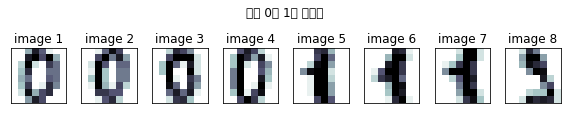

In [3]:
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt

digits=load_digits()
samples=[0,10,20,30,1,11,21,31]
d=[]
for i in range(8):
    d.append(digits.images[samples[i]])
    
plt.figure(figsize=(8,2))
for i in range(8):
    plt.subplot(1,8,i+1)
    plt.imshow(d[i],interpolation='nearest', cmap=plt.cm.bone_r)
    plt.grid(False); plt.xticks([]); plt.yticks([])
    plt.title("image {}".format(i+1))
plt.suptitle("숫자 0과 1의 이미지")
plt.tight_layout()
plt.show()

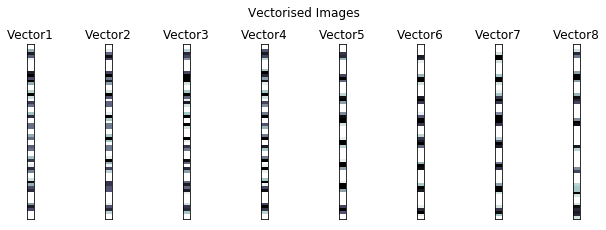

In [6]:
v=[]
for i in range(8):
    v.append(d[i].reshape(64,1))
    
plt.figure(figsize=(8,3))
for i in range(8):
    plt.subplot(1,8,i+1)
    plt.imshow(v[i],aspect=0.4, interpolation='nearest', cmap=plt.cm.bone_r)
    plt.grid(False); plt.xticks([]); plt.yticks([])
    plt.title("Vector{}".format(i+1))
plt.suptitle("Vectorised Images", y=1.05)
plt.tight_layout(w_pad=7)
plt.show()
    